TOC
- Data cleaning
- Analyse the relation between load_status and categorical variables
- Analyse the relation between load_status and continueous variables

# 1 Data cleaning

## 1.1 Remove useless columns
1. Customer behaviour variables
2. Unique columns: `id` and `member_id`
3. Text columns: `url`, `desc`, `emp_title` and `title`


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/jiajinggu/Desktop/Upgrad/Courses/Case Study_Lending Club/loan.csv')

# df = pd.read_csv(DATA_DIR + "loan.csv", low_memory=False)

customer_behaviour_columns = [
    "delinq_2yrs",
    "earliest_cr_line",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "revol_bal",
    "revol_util",
    "total_acc",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "last_credit_pull_d",
    "application_type",
]

unique_columns = ["id", "member_id"]
text_columns = ["desc", "url", "emp_title", "title"]

removed_columns = customer_behaviour_columns + unique_columns + text_columns
df.drop(removed_columns, axis=1, inplace=True)

df.to_csv(DATA_DIR + 'loan-v1-remove-columns-useless.csv', index=False)

print(f"Removed column count: {len(removed_columns)}")
print(f"Remain column count: {len(df.columns)}")

/var/folders/7c/02s13lcn4n982whjt600_4000000gn/T/ipykernel_14850/3102841907.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jiajinggu/Desktop/Upgrad/Courses/Case Study_Lending Club/loan.csv')


Removed column count: 27
Remain column count: 84


## 1.2 Remove columns with missing value percertage > 50%





In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv(DATA_DIR + "loan-v1-remove-columns-useless.csv", low_memory=False)
MISSING_THREHOLD = 0.5

df = df.replace([''], np.nan)
missing_perc = df.isna().mean()

missing_value_columns = []
for col_name, percent in missing_perc.items():
  if percent >= MISSING_THREHOLD:
    missing_value_columns.append(col_name)

df.drop(missing_value_columns, axis=1, inplace=True)

df.to_csv(DATA_DIR + 'loan-v2-remove-columns-with-missing-value-percetage-50.csv', index=False)

print(f"Removed column count: {len(missing_value_columns)}")
print(f"Remain column count: {len(df.columns)}")


Removed column count: 57
Remain column count: 27


## 1.3 Remove columns with only one value

In [43]:
import pandas as pd

df = pd.read_csv(DATA_DIR + "loan-v2-remove-columns-with-missing-value-percetage-50.csv", low_memory=False)

unique_counts = df.apply(pd.Series.nunique)

one_value_columns = []
for col_name, count in unique_counts.items():
  if count == 0 or count == 1:
    one_value_columns.append(col_name)

df.drop(one_value_columns, axis=1, inplace=True)

df.to_csv(DATA_DIR + 'loan-v3-remove-columns-with-only-zero-or-one-value.csv', index=False)

print(f"Removed column count: {len(one_value_columns)}")
print(f"Remain column count: {len(df.columns)}")

Removed column count: 8
Remain column count: 19


## 1.4 Drop rows `loan_status` is `Current`

In [44]:
import pandas as pd

df = pd.read_csv(DATA_DIR + "loan-v3-remove-columns-with-only-zero-or-one-value.csv", low_memory=False)

df = df[df['loan_status'] != 'Current']

df.to_csv(DATA_DIR + 'loan-v4-drop-rows-loan_status-is-current.csv', index=False)


df.shape



(38577, 19)

## 1.5 Drop duplicates

In [45]:
import pandas as pd

df = pd.read_csv(DATA_DIR + "loan-v4-drop-rows-loan_status-is-current.csv", low_memory=False)

df = df.drop_duplicates()
df.to_csv(DATA_DIR + 'loan-v5-drop-duplicates.csv', index=False)


df.shape


(38577, 19)

## 1.6 Impute data

In [107]:
import pandas as pd
import numpy as np

df = pd.read_csv(DATA_DIR + "loan-v5-drop-duplicates.csv", low_memory=False)

df = df.replace('', np.nan)
missing_percentage = df.isna().mean()

missing_columns = []
for col_name, missing in missing_percentage.items():
  if missing > 0.0:
    print(col_name, missing * 100)

emp_length_null_count = df['emp_length'].isnull().sum()
pub_rec_bankruptcies_null_count = df['pub_rec_bankruptcies'].isnull().sum()
print(f"Null count of [emp_lengt] is: {emp_length_null_count}")
print(f"Null count of [pub_rec_bankruptcies] is: {pub_rec_bankruptcies_null_count}")

df['emp_length'] = df['emp_length'].fillna('Unknown')
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0.0)

df.to_csv(DATA_DIR + 'loan-v6-impute-data.csv', index=False)

emp_length 2.6777613603960906
pub_rec_bankruptcies 1.8067760582730643
Null count of [emp_lengt] is: 1033
Null count of [pub_rec_bankruptcies] is: 697


# 2 Analyse the ralation between `load_status` and categorical variables

In [70]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(DATA_DIR + 'loan-v6-impute-data.csv')


def draw_bar_chart(df: pd.DataFrame, x_col_name: str, y_col_name: str, title: str, graph_size: tuple = (8, 6), table_bbox: tuple = (0, -0.4, 1, 3)):
  # Create a new figure with two subplots, one for the chart and one for the table
  fig, (ax1, ax2) = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [2, 1]}, figsize=graph_size)
  #fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=graph_size)

  # Create the chart subplot
  ct = pd.crosstab(df[x_col_name], df[y_col_name], normalize='index')
  ct.plot(kind='bar', stacked=True, ax=ax1)
  ax1.set_title(title)
  ax1.set_xlabel(x_col_name)
  ax1.set_ylabel('Proportion')

  # Create the table subplot
  ct_cum = ct.cumsum(axis=1)
  ct_cum['Total'] = ct_cum.sum(axis=1)
  ct_cum = ct_cum.apply(lambda x: round(x, 3))
  table = ax2.table(cellText=ct_cum.values, colLabels=ct_cum.columns, rowLabels=ct_cum.index,
                    loc='center', cellLoc='center', bbox=table_bbox)
  table.auto_set_font_size(False)
  table.set_fontsize(10)
  table.scale(1, 1.5)
  ax2.axis('off')

  # Adjust the layout and display the figure
  fig.tight_layout()
  plt.show()


## 2.1. Analyze the categorical univariate "loan_status" Column 

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64


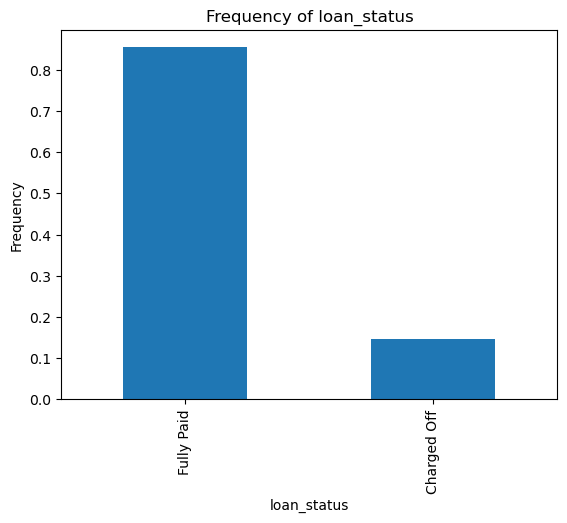

In [48]:
import matplotlib.pyplot as plt

# Display the frequency table of the categorical variable
freq_table = df['loan_status'].value_counts(normalize=True)
print(freq_table)

# Create a bar chart of the frequency table
freq_table.plot(kind='bar')
plt.title('Frequency of loan_status')
plt.xlabel('loan_status')
plt.ylabel('Frequency')
plt.show()

plt.show()

## 2.2. Analyze the categorical variate "loan_status"  With other categorical variates


## 2.2.1. grade,sub_grade

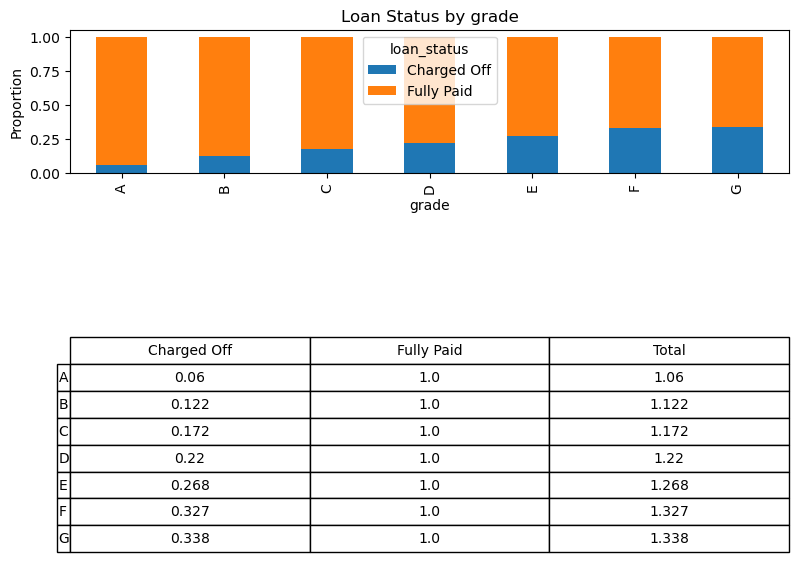

In [71]:
import seaborn as sns

draw_bar_chart(df, x_col_name='grade', y_col_name='loan_status', title='Loan Status by grade',graph_size = (8, 6), table_bbox = (0, -0.4, 1, 3))

The possibility of charged off is related with region:

The possibility is G > F > E > D > C > B > A

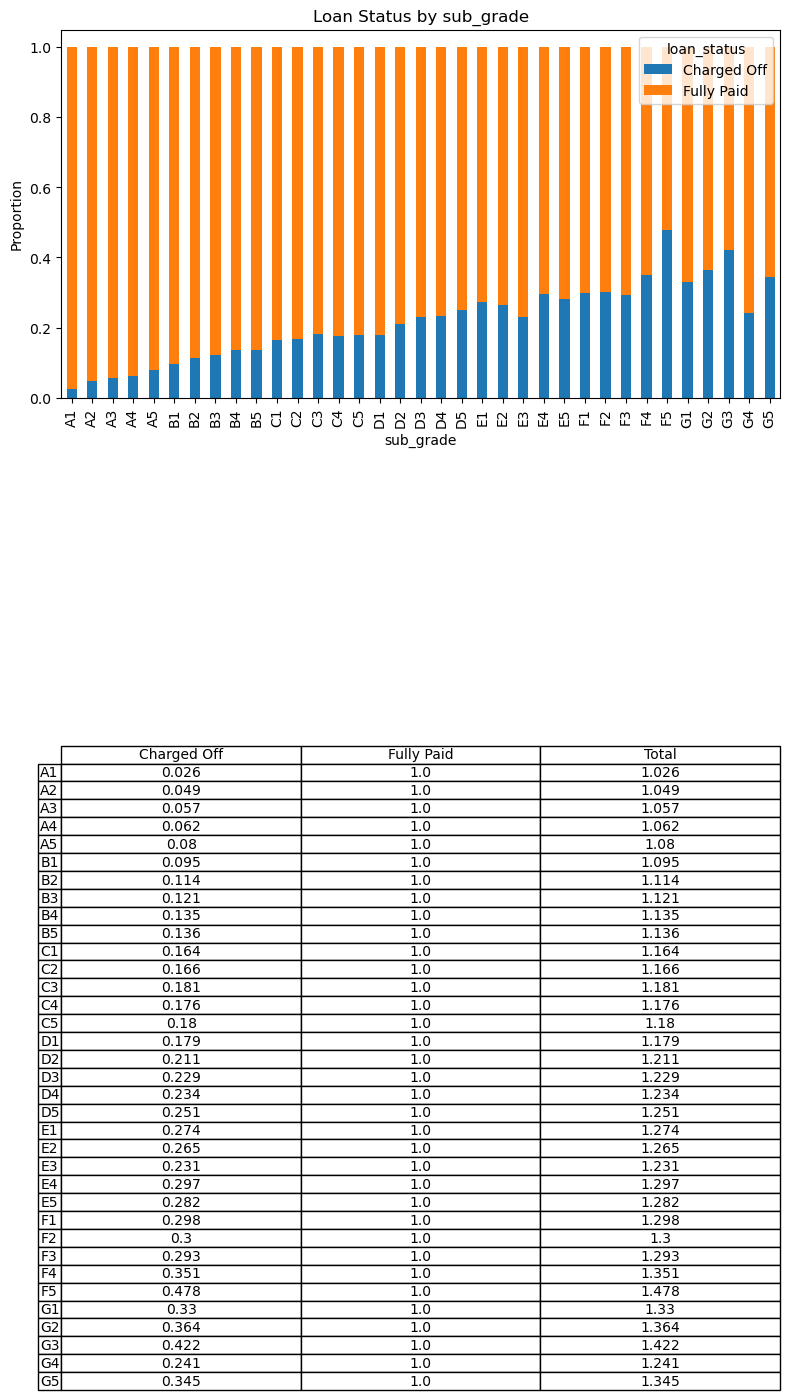

In [84]:
draw_bar_chart(df, x_col_name='sub_grade', y_col_name='loan_status', title='Loan Status by sub_grade',graph_size = (8, 16), table_bbox = (0, -1, 1, 3.5))

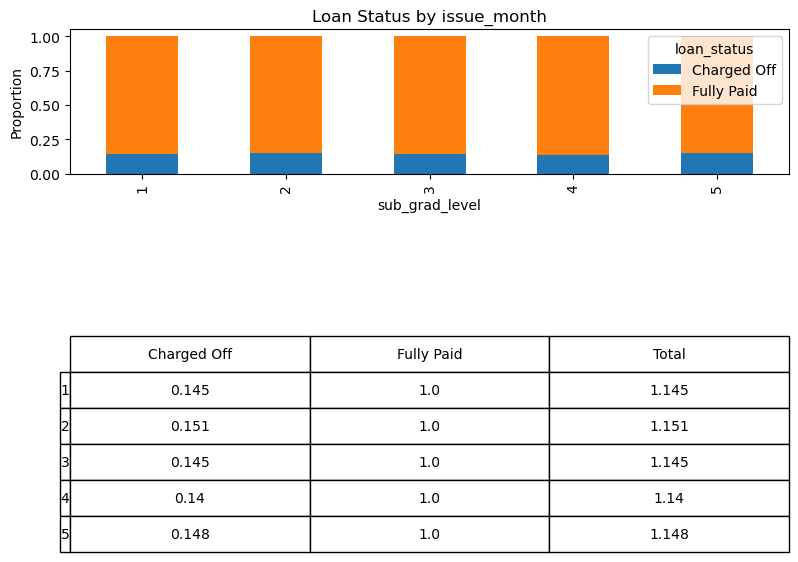

In [88]:
df['sub_grad_level'] = df['sub_grade'].str[1]

draw_bar_chart(df, x_col_name='sub_grad_level', y_col_name='loan_status', title='Loan Status by issue_month')

### 2.2.2 home_ownership

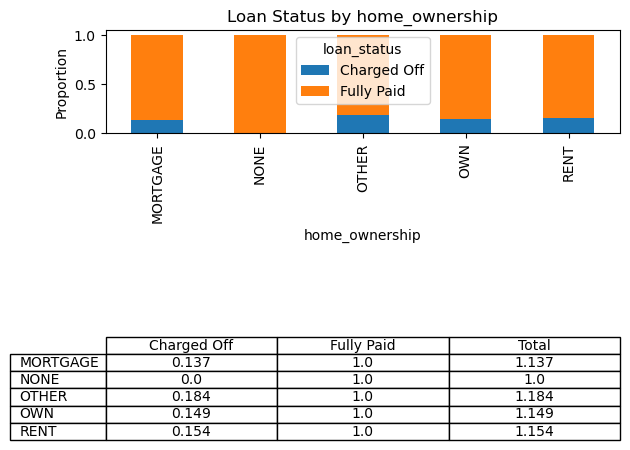

In [15]:
draw_bar_chart(df, x_col_name='home_ownership', y_col_name='loan_status', title='Loan Status by home_ownership')

People with `NONE` home ownership are more likely to full pay the loan.
Other type of home ownership don't have signicant difference.

## 2.2.3 verification_status

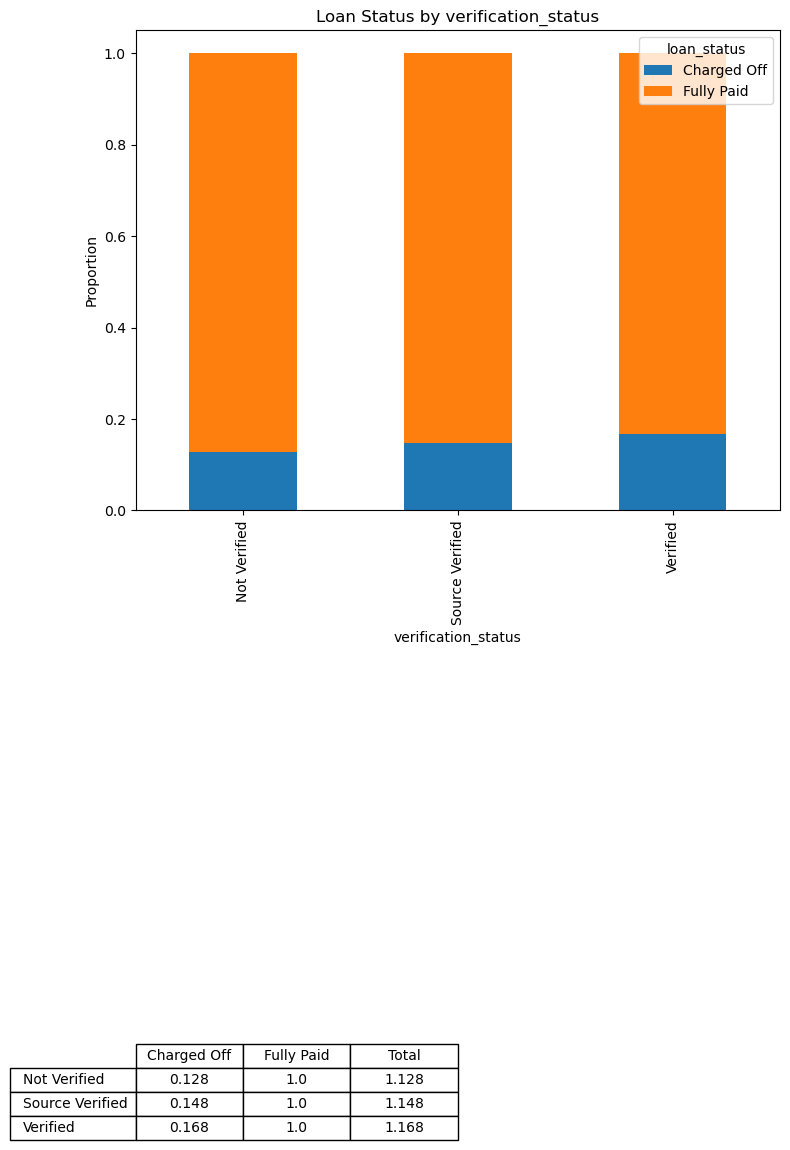

In [115]:
draw_bar_chart(df, x_col_name='verification_status', y_col_name='loan_status', title='Loan Status by verification_status',graph_size = (8, 12), table_bbox = (0, -1, 0.5, 0.4))

The people with `verified` income has more possibility to fully pay, whereas not verfied income has less possibility to fully pay.

## 2.2.4 issue_d

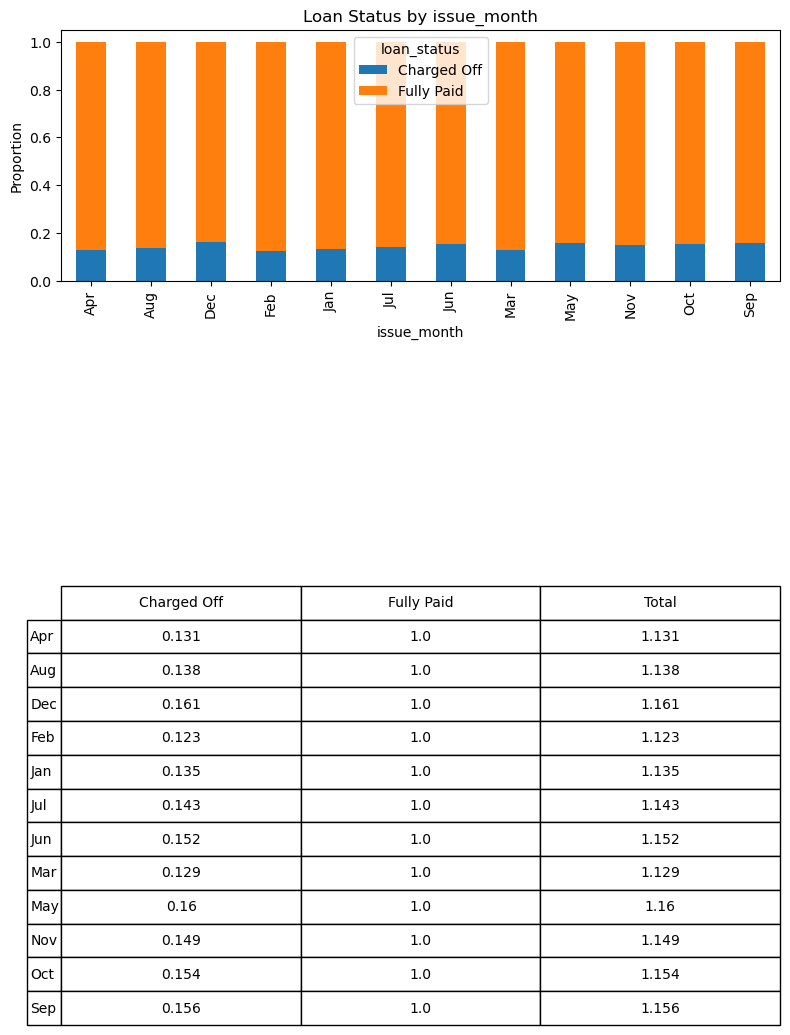

In [118]:
df[['issue_month', 'issue_date']] = df['issue_d'].str.split('-', expand=True)

draw_bar_chart(df, x_col_name='issue_month', y_col_name='loan_status', title='Loan Status by issue_month',graph_size = (8, 12), table_bbox = (0, -1, 1, 3.5))

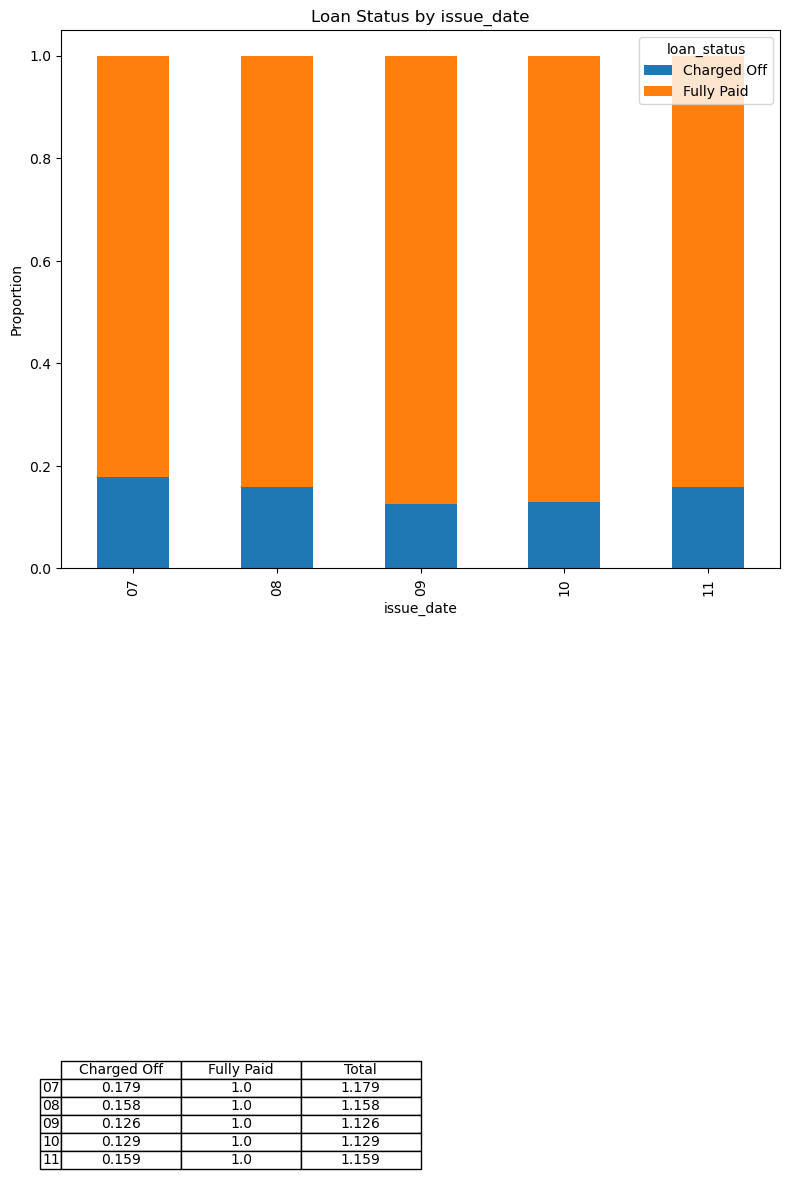

In [120]:
draw_bar_chart(df, x_col_name='issue_date', y_col_name='loan_status', title='Loan Status by issue_date',graph_size = (8, 12), table_bbox = (0, -1, 0.5, 0.4))

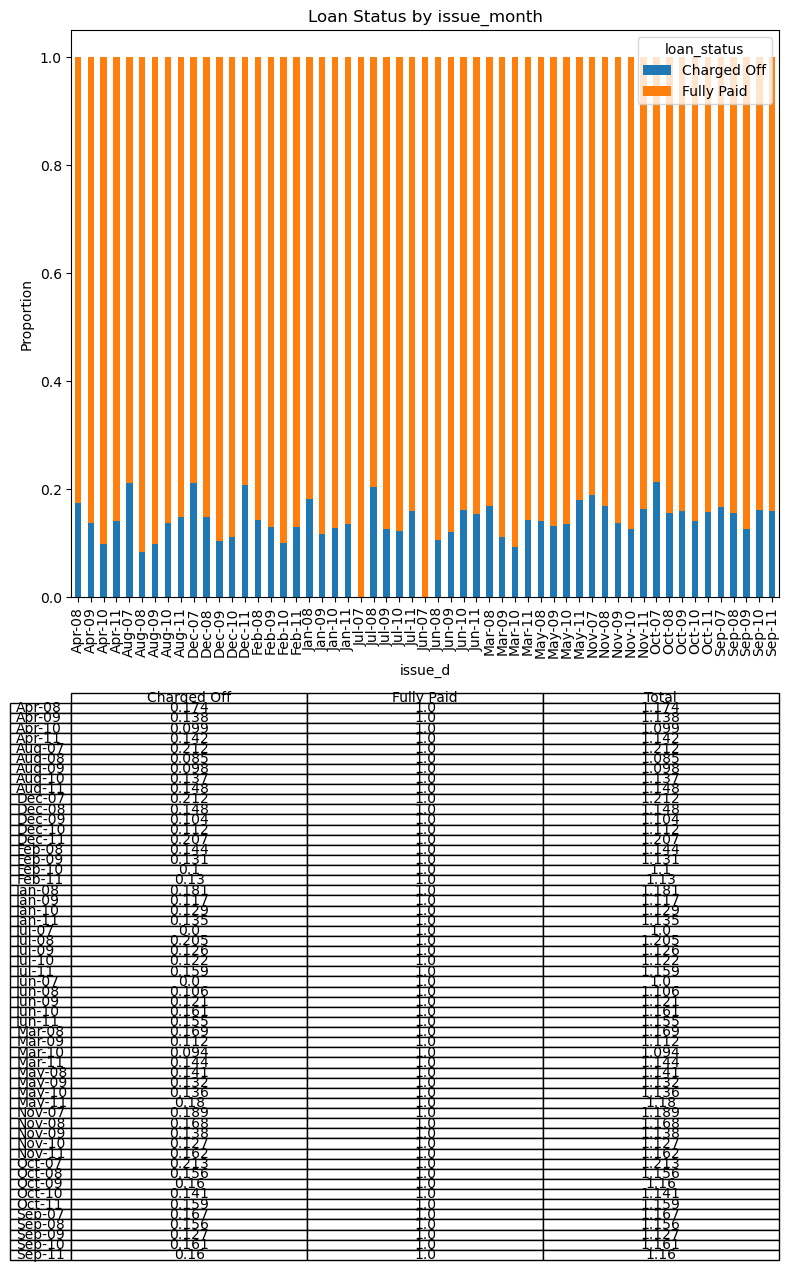

In [106]:
draw_bar_chart(df, x_col_name='issue_d', y_col_name='loan_status', title='Loan Status by issue_month',graph_size = (8, 13), table_bbox = (0, -1, 1, 2))

### 2.2.5 emp_length

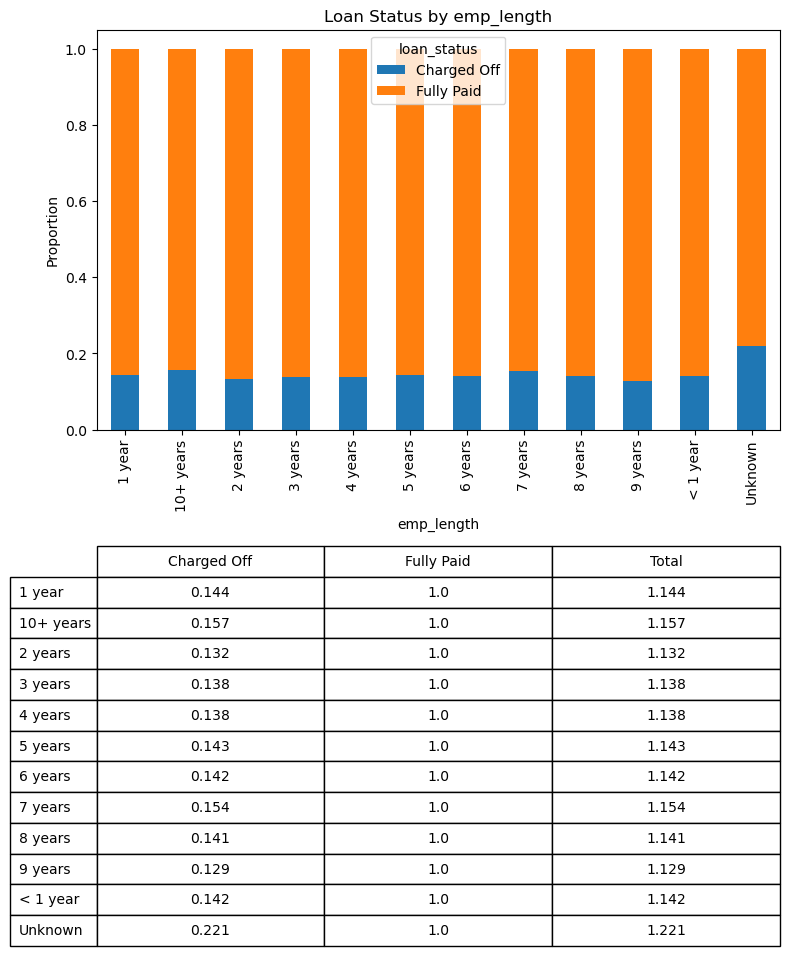

In [122]:
draw_bar_chart(df, x_col_name='emp_length', y_col_name='loan_status', title='Loan Status by emp_length',graph_size = (8, 10), table_bbox = (0, -1, 1, 2))

### 2.2.6 purpose

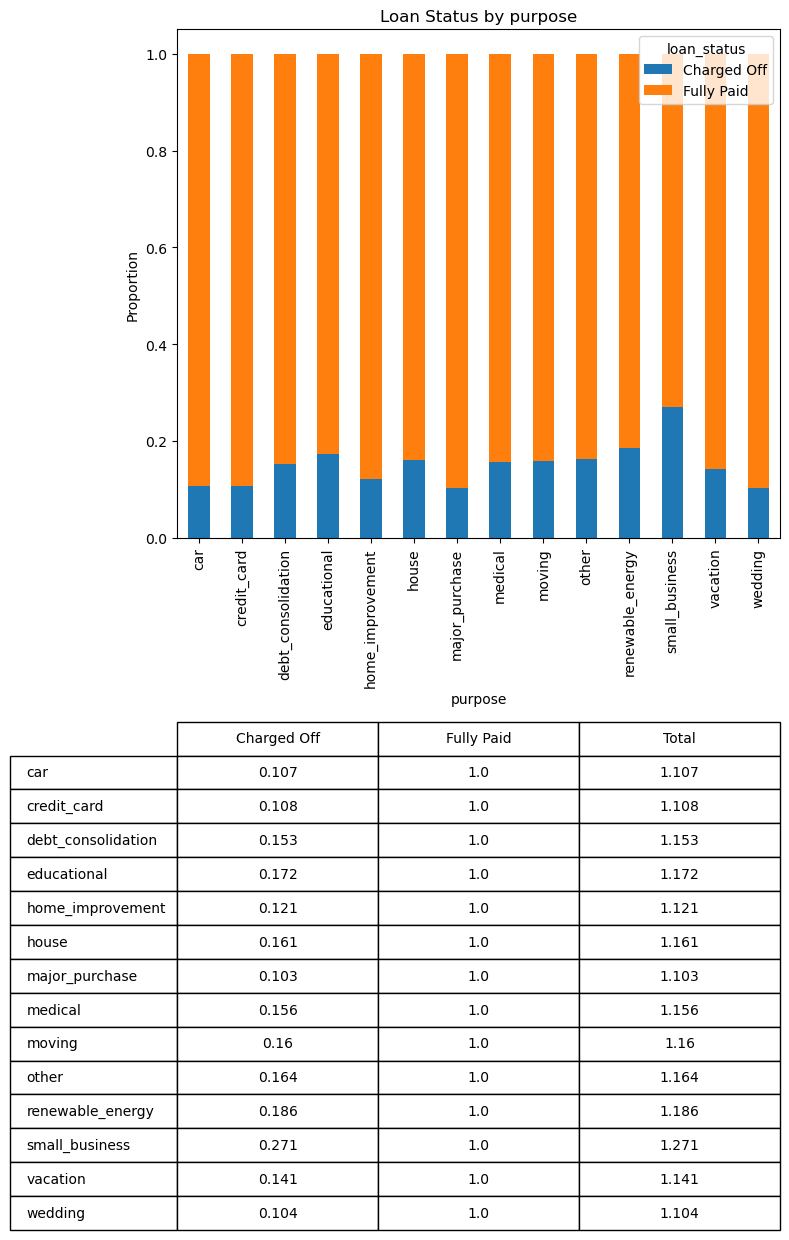

In [123]:
draw_bar_chart(df, x_col_name='purpose', y_col_name='loan_status', title='Loan Status by purpose',graph_size = (8, 13), table_bbox = (0, -1, 1, 2))

### 2.2.7 addr_state

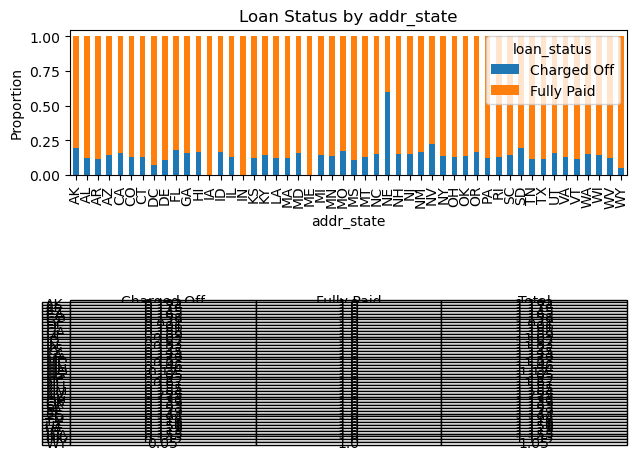

In [22]:
draw_bar_chart(df, x_col_name='addr_state', y_col_name='loan_status', title='Loan Status by addr_state',graph_size = (8, 13), table_bbox = (0, -1, 1, 2))

People from state `NE` are more likely to default

### 2.2.8 term

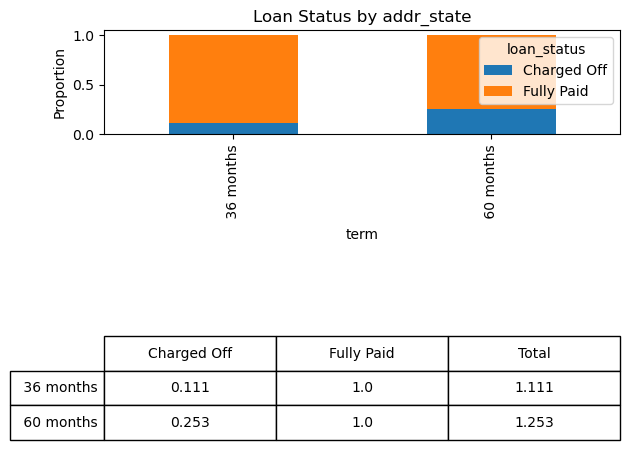

In [23]:
draw_bar_chart(df, x_col_name='term', y_col_name='loan_status', title='Loan Status by term',graph_size = (8, 13), table_bbox = (0, -1, 1, 2))

People lend a term of `60 months` more likely to default

### 2.2.9 pub_rec_bankruptcies

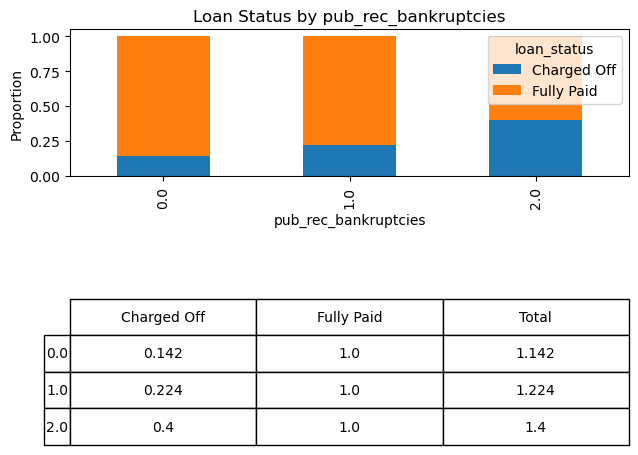

In [24]:
draw_bar_chart(df, x_col_name='pub_rec_bankruptcies', y_col_name='loan_status', title='Loan Status by pub_rec_bankruptcies',graph_size = (8, 13), table_bbox = (0, -1, 1, 2))

People who had back ruptcies 2 times are more charged off

# 3 Analyse the relation between `loan_status` and Continueous Varibles

## 3.1. analyse the correlation between the Continueous Varibles

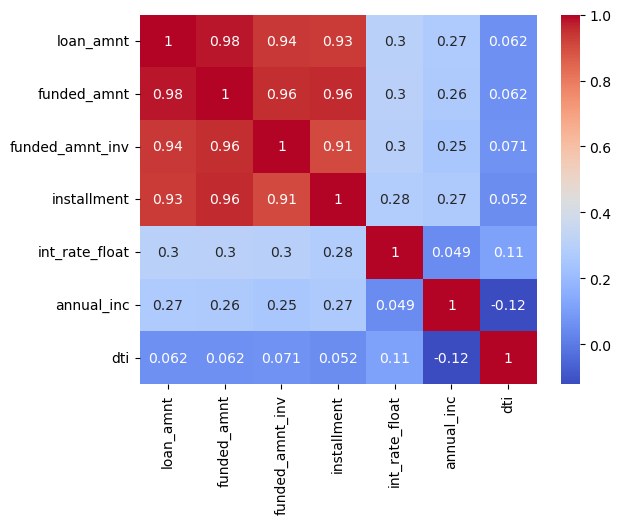

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/jiajinggu/Desktop/Upgrad/Courses/Case Study_Lending Club/loan-v6-impute-data.csv')

#change %type into float type to calculation correlation
df["int_rate_float"] = df["int_rate"].str.replace('%', '').astype(float) / 100

columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',  'installment', 'int_rate_float','annual_inc', 'dti']

#Create a correlation matrix using pandas
corr_matrix = df[columns].corr()

#Use seaborn to create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

Since 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment' have high correlation with each other, in the following analyze we will pick one of the 4 to analyze their influence on 'loan_status'.

Here, let's choose 'funded_amnt'.

## 3.2. analyze the influence of Continuous Variables with categorical 'loan_status'

### 3.2.1. 'funded_amnt' and 'loan_status' 

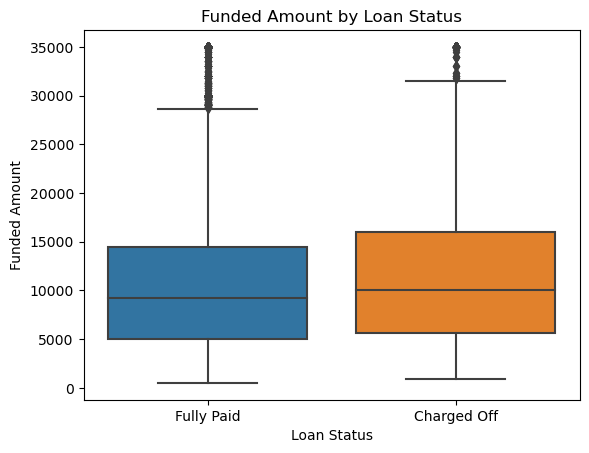

loan_status
Charged Off    11753.398792
Fully Paid     10618.520486
Name: funded_amnt, dtype: float64
loan_status
Charged Off    16000.0
Fully Paid     14500.0
Name: funded_amnt, dtype: float64
loan_status
Charged Off    10000.0
Fully Paid      9200.0
Name: funded_amnt, dtype: float64
loan_status
Charged Off    5575.0
Fully Paid     5050.0
Name: funded_amnt, dtype: float64


In [3]:
import seaborn as sns

# Create a box plot of funded amount by loan status
sns.boxplot(x='loan_status', y='funded_amnt', data=df)
plt.title('Funded Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount')
plt.show()

# Calculate summary statistics of funded amount by loan status
grouped = df.groupby('loan_status')['funded_amnt']
print(grouped.mean())
print(grouped.quantile(0.75))
print(grouped.quantile(0.5))
print(grouped.quantile(0.25))

The medium and quarter quantile of charged off is more than that of fully paid.
It indicates that the people with less 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment' are more willing to 'Fully paid'.

### 3.2.2. 'int_rate' and 'loan_status'

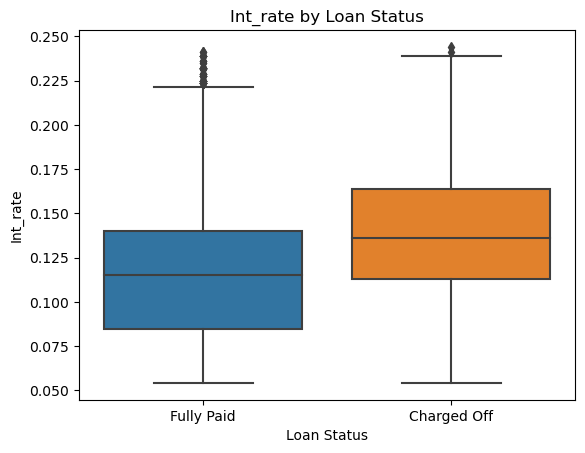

loan_status
Charged Off    0.138204
Fully Paid     0.116098
Name: int_rate_float, dtype: float64
loan_status
Charged Off    0.1640
Fully Paid     0.1399
Name: int_rate_float, dtype: float64
loan_status
Charged Off    0.1361
Fully Paid     0.1149
Name: int_rate_float, dtype: float64
loan_status
Charged Off    0.1131
Fully Paid     0.0849
Name: int_rate_float, dtype: float64


In [4]:
# Create a box plot of funded amount by loan status
sns.boxplot(x='loan_status', y='int_rate_float', data=df)
plt.title('Int_rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Int_rate')
plt.show()

# Calculate summary statistics of funded amount by loan status
grouped = df.groupby('loan_status')['int_rate_float']
print(grouped.mean())
print(grouped.quantile(0.75))
print(grouped.quantile(0.5))
print(grouped.quantile(0.25))

### 3.2.3. 'annual_inc' and 'loan_status'

In [9]:
#The salary of some people is too high, so that we need to elimitate the influence of outliers of these data.
#The method we use is "Tukey's method".

from scipy.stats import iqr

# Calculate the interquartile range (IQR) for the "annual_inc" column
q1 = df['annual_inc'].quantile(0.25)
q3 = df['annual_inc'].quantile(0.75)
iqr = iqr(df['annual_inc'])

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove any data points that fall outside of the outlier bounds
df = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]

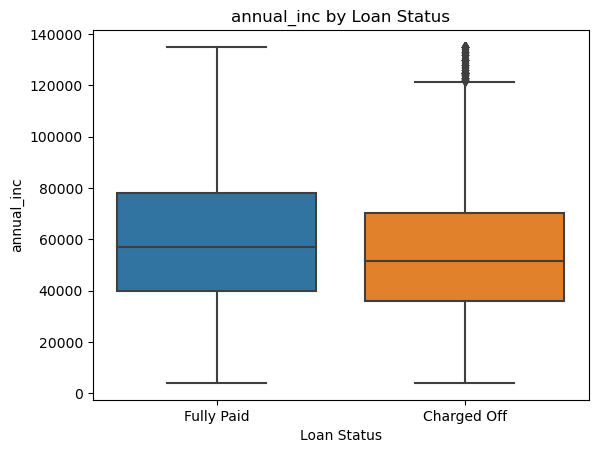

loan_status
Charged Off    56027.346338
Fully Paid     61002.097095
Name: annual_inc, dtype: float64
loan_status
Charged Off    70374.0
Fully Paid     78000.0
Name: annual_inc, dtype: float64
loan_status
Charged Off    51600.0
Fully Paid     57000.0
Name: annual_inc, dtype: float64
loan_status
Charged Off    36070.98
Fully Paid     40000.00
Name: annual_inc, dtype: float64


In [10]:
# Create a box plot of funded amount by loan status
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('annual_inc by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('annual_inc')
plt.show()

# Calculate summary statistics of funded amount by loan status
grouped = df.groupby('loan_status')['annual_inc']
print(grouped.mean())
print(grouped.quantile(0.75))
print(grouped.quantile(0.5))
print(grouped.quantile(0.25))

### 3.2.4. 'dti' and 'loan_status'

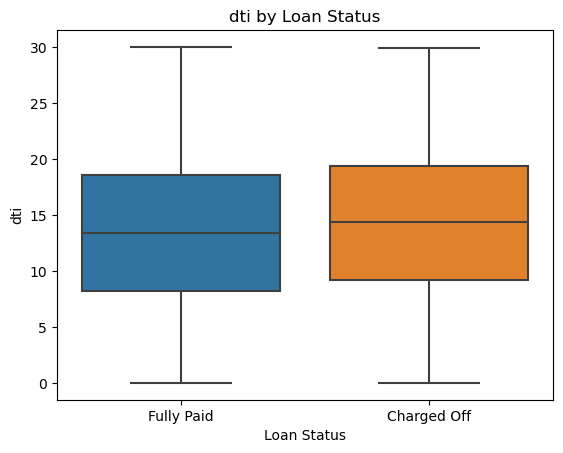

loan_status
Charged Off    14.102541
Fully Paid     13.322548
Name: dti, dtype: float64
loan_status
Charged Off    19.40
Fully Paid     18.58
Name: dti, dtype: float64
loan_status
Charged Off    14.40
Fully Paid     13.42
Name: dti, dtype: float64
loan_status
Charged Off    9.18
Fully Paid     8.19
Name: dti, dtype: float64


In [8]:
# Create a box plot of funded amount by loan status
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title('dti by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('dti')
plt.show()

# Calculate summary statistics of funded amount by loan status
grouped = df.groupby('loan_status')['dti']
print(grouped.mean())
print(grouped.quantile(0.75))
print(grouped.quantile(0.5))
print(grouped.quantile(0.25))